In [35]:
import torch
import torchvision
import torchvision.transforms as transforms
from PIL import Image
import os

transform = transforms.Compose(
    [  transforms.Resize(32),
     transforms.Pad(10, fill=255),
     transforms.CenterCrop((32, 32)),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ]
)

def check_image(path):
    try:
        im = Image.open(path)
        im.verify()
        return True
        
    except:
        print(path)
        return False
    finally:
        im.close()


trainset = torchvision.datasets.ImageFolder(root='../datasets/Kolory_mini/', transform=transform,is_valid_file = check_image)
testset = torchvision.datasets.ImageFolder(root='../datasets/Kolory_mini/', transform=transform,is_valid_file = check_image)


trainloader = torch.utils.data.DataLoader(trainset, batch_size=16, shuffle=True, num_workers=12, drop_last=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=16, shuffle=True, num_workers=12, drop_last=True)
print("Done")

Done


tensor(-0.6549)


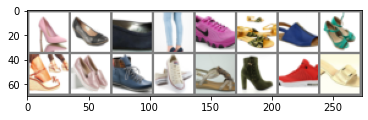

In [36]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images[0].min())

# show images
imshow(torchvision.utils.make_grid(images))

# print labels
#print(' '.join('%5s' % classes[labels[j]] for j in range(4)))



In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 14)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)
net.to(device)

cuda:0


Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=14, bias=True)
)

In [37]:
%%time

import torch.optim as optim

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

BATCH_SIZE = 16
EPOCHS = 15
OUTPUTS= 1
LR = 0.025
MINI_BATCH_SIZE = 500

print("wololo1")

criterion = nn.CrossEntropyLoss()
print("wololo3")

optimizer = optim.SGD(net.parameters(), lr=LR, momentum=0.9)
print("wololo4")

for epoch in range(EPOCHS):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        
        inputs, labels = data[0].to(device), data[1].to(device)
        #inputs, labels = data
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % MINI_BATCH_SIZE == MINI_BATCH_SIZE - 1:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
             (epoch + 1, i-1,running_loss / MINI_BATCH_SIZE))
            running_loss = 0.0
        
    correct = 0
    total = 0
    with torch.no_grad():
        for data in testloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    print('Accuracy of the network on the 10000 test images: %.2f %%' % (
    100.0 * correct / total))

print('Finished Training')

cuda:0
wololo1
wololo3
wololo4
[1,   498] loss: 2.403
Accuracy of the network on the 10000 test images: 23.95 %
[2,   498] loss: 2.140
Accuracy of the network on the 10000 test images: 34.82 %
[3,   498] loss: 2.048
Accuracy of the network on the 10000 test images: 35.14 %
[4,   498] loss: 2.001
Accuracy of the network on the 10000 test images: 32.73 %
[5,   498] loss: 1.974
Accuracy of the network on the 10000 test images: 32.56 %
[6,   498] loss: 1.923
Accuracy of the network on the 10000 test images: 38.45 %
[7,   498] loss: 1.893
Accuracy of the network on the 10000 test images: 37.89 %
[8,   498] loss: 1.938
Accuracy of the network on the 10000 test images: 38.00 %
[9,   498] loss: 1.854
Accuracy of the network on the 10000 test images: 39.21 %
[10,   498] loss: 1.933
Accuracy of the network on the 10000 test images: 38.86 %
[11,   498] loss: 1.904
Accuracy of the network on the 10000 test images: 38.81 %
[12,   498] loss: 1.899
Accuracy of the network on the 10000 test images: 38

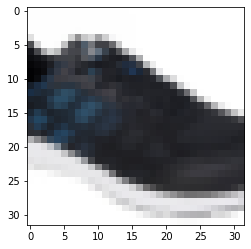

tensor([[-1.0007,  0.3057,  1.1468, -2.7095, -2.2706,  2.1910,  2.8463,  2.8963,
          0.5560, -1.4890, -0.9385, -0.0219, -2.8346,  2.1300]],
       device='cuda:0')
{0: 'biel', 1: 'czern', 2: 'inny-kolor', 3: 'odcienie-brazu-i-bezu', 4: 'odcienie-czerwieni', 5: 'odcienie-fioletu', 6: 'odcienie-granatowego', 7: 'odcienie-niebieskiego', 8: 'odcienie-pomaranczowego', 9: 'odcienie-rozu', 10: 'odcienie-szarosci-i-srebra', 11: 'odcienie-zieleni', 12: 'odcienie-zoltego-i-zlota', 13: 'wielokolorowy'}
odcienie-niebieskiego


In [38]:
import requests
from torch.autograd import Variable


url1 = "https://chillizet-static.hitraff.pl/uploads/productfeeds/images/99/dd/house-klapki-friends-czarny.jpg"
url2 = "https://e-obuwniczy.pl/pol_pl_POLBUTY-BUT-BAL-VENETTO-635-SKORA-LICOWA-CZARNY-2551_5.jpg"
url3 = "https://bhp-nord.pl/33827-thickbox_default/but-s1p-portwest-steelite-tove-ft15.jpg"
url4 = "https://www.sklepmartes.pl/174554-thickbox_default/dzieciece-kalosze-cosy-wellies-kids-2076-victoria-blue-bejo.jpg"

img = Image.open(requests.get(url3, stream=True).raw)

image_tensor = transform(img).float()
imshow(image_tensor)
image_tensor = image_tensor.unsqueeze_(0)
inputi = Variable(image_tensor)


output = net(inputi.to(device))
_, predicted = torch.max(output.data, 1)

print(output.data)
idx2class = {v: k for k, v in trainset.class_to_idx.items()}
print(idx2class)

print(idx2class[int(predicted)])


#import pickle
#a_file = open("class-shoe.pkl", "wb")
#pickle.dump(shoe_names, a_file)
#a_file.close()

#a_file = open("class-shoe.pkl", "rb")
#outpu = pickle.load(a_file)
#print(outpu[int(predicted)])
#a_file.close()

In [39]:
import numpy as np
import os.path
import csv

if not (os.path.isfile("nn-col-state-dict.pth")):
    torch.save(net.state_dict(), "nn-col-state-dict.pth")
    